# Data Cleansing and Preparation:
## The following data cleansing and preparation steps were followed by the work in the source below:
### https://www.kaggle.com/code/syedali110/intrusion-detection-using-ann
## The neural-network model implementation, analysis, and evaluation are unique to this notebook with.

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv('../../../data/Friday-WorkingHours-Morning.pcap_ISCX.csv')

In [5]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [6]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df[' Label']= encoder.fit_transform(df[' Label'])

In [8]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,0
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,0
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,0
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,0
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,0


In [9]:
df[' Label'].value_counts().sum

<bound method Series.sum of  Label
0    189067
1      1966
Name: count, dtype: int64>

In [10]:
df = df.fillna(0)  # Replace NaN with 0
df = df.replace([np.inf, -np.inf], 0)

In [11]:
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [12]:
df=df.astype(int)

In [13]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(' Label',axis=1)
y = df[' Label']

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
from sklearn.impute import SimpleImputer
# Impute missing values (replace NaNs with the mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Determine the number of columns (features) in your DataFrame
num_columns = df.shape[1]

# Set an appropriate value for k (less than or equal to the number of columns)
k = min(10, num_columns)  # Adjust this as needed

# Initialize SelectKBest with the scoring function
k_best = SelectKBest(score_func=f_classif, k=k)

# Fit and transform the imputed data to select the top 10 features
X_new = k_best.fit_transform(X_imputed, y)

C:\Users\grace\.conda\envs\tensorflow_env\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [31 32 33 49 56 57 58 59 60 61] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\grace\.conda\envs\tensorflow_env\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [16]:
# Get the boolean mask of selected features
selected_features_mask = k_best.get_support()

In [17]:
elected_feature_names = X.columns[selected_features_mask]

In [18]:
elected_feature_names

Index([' Destination Port', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packets/s', ' Min Packet Length',
       ' PSH Flag Count', ' URG Flag Count', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' min_seg_size_forward'],
      dtype='object')

In [19]:
new_columns=[' Destination Port', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packets/s', ' Min Packet Length',
       ' PSH Flag Count', ' URG Flag Count', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' min_seg_size_forward']

In [20]:
df_new=X[new_columns]

In [21]:
df_new

,Destination Port,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packets/s,Min Packet Length,PSH Flag Count,URG Flag Count,Avg Fwd Segment Size,Avg Bwd Segment Size,min_seg_size_forward
0,3268,72,72,0,0,0,0,201,72,32
1,389,316,316,0,0,0,0,201,316,32
2,0,0,0,0,0,0,0,0,0,0
3,5355,0,0,0,28,0,0,28,0,32
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
191028,53,177,177,32,45,0,0,45,177,20
191029,53,136,136,11695,40,0,0,40,136,32
191030,53,177,177,9009,45,0,0,45,177,32
191031,123,48,48,59,48,0,0,48,48,20


In [22]:
df_new.loc[:, 'label'] = df[' Label']

C:\Users\grace\AppData\Local\Temp\ipykernel_7708\3870757279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[:, 'label'] = df[' Label']


In [23]:
X1=df_new.iloc[:,:-1].values
y1=df_new.iloc[:,-1].values

In [24]:
X1

array([[3268,   72,   72, ...,  201,   72,   32],
       [ 389,  316,  316, ...,  201,  316,   32],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [  53,  177,  177, ...,   45,  177,   32],
       [ 123,   48,   48, ...,   48,   48,   20],
       [  53,   50,   50, ...,   34,   50,   20]])

# K-Folds Cross-Validation Concept:
This code implements K-Folds Cross-Validation, a technique used to evaluate the performance of a machine learning model more robustly. Instead of splitting the dataset once into training and testing sets, the data is split into 'k' subsets or 'folds'. The model is trained on 'k-1' folds and tested on the remaining fold. This process is repeated 'k' times, with each fold used as the test set once. The final result is the average performance across all folds, providing a more reliable estimate of the model's performance.

- **k = 2**: The number of folds is set to 2. This means the dataset will be split into 2 subsets, with 1 subset used for training and the other for testing, and then the roles are reversed for the second fold.
- **KFold(n_splits=k, shuffle=True, random_state=42)**: The `KFold` class from `sklearn.model_selection` is used to create the k-folds. 
    - `n_splits=k`: Specifies the number of folds.
    - `shuffle=True`: Shuffles the dataset before splitting into folds to ensure random distribution.
    - `random_state=42`: Fixes the random seed to make the results reproducible.
- **fold_no = 1**: Keeps track of the fold number in the cross-validation loop (used later when looping over folds).
- **all_fold_accuracies = []**: This list will store the accuracy scores from each fold to calculate the average accuracy across all folds at the end.

K-Folds Cross-Validation helps mitigate overfitting by evaluating the model on different subsets of the data and provides a more accurate estimate of model performance.

In [25]:
#CONCEPt KFOLDS
# Number of folds
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
fold_no = 1
all_fold_accuracies = []

# K-Folds Cross-Validation Neural Network Training and Evaluation:

This block of code performs K-Folds Cross-Validation to train and evaluate an Artificial Neural Network (ANN) model on different subsets of the data. The process helps ensure that the model is evaluated on various parts of the dataset, providing a more robust understanding of its performance. Here’s a step-by-step breakdown of the code:

1. **K-Folds Iteration**: 
    - The `kf.split(X)` splits the dataset into `k` folds, where `X` is the feature matrix. For each fold, we get two sets of indices: `train_index` for training data and `test_index` for testing data. 
    - The loop iterates through each fold, and for every iteration (fold), the model is trained and evaluated.

2. **Data Splitting**:
    - **Initial Split**: The data is split into training and testing sets using `train_test_split`, with a **90% training and 10% testing split** (`test_size=0.1`).
    - **Further Split for Validation**: The training data is split again to create a validation set, with **80% of the original data used for training** and **10% for validation** (`test_size=0.1111`). This helps in monitoring model performance during training.

3. **Building the ANN**:
    - A new Sequential model is built for each fold. 
    - It consists of 3 layers: 
      - 2 hidden layers with 10 units each and `sigmoid` activation function.
      - 1 output layer with a single unit and `sigmoid` activation for binary classification.
      
4. **Model Compilation and Training**:
    - The model is compiled with:
        - **Optimizer**: `'adam'`, which is widely used for efficient gradient-based optimization.
        - **Loss Function**: `'binary_crossentropy'`, used for binary classification problems.
        - **Metric**: `'accuracy'`, to evaluate the performance on both training and validation sets.
    - The model is trained for 10 epochs using `ann.fit()`, with a batch size of 32. Validation data is provided during training, and early stopping can be used to prevent overfitting.
    
5. **Model Evaluation**:
    - The model is evaluated on the test set for each fold.
    - **Prediction**: The model outputs probabilities (`y_pred_prob`), which are converted into binary predictions (`y_pred`) using a threshold of 0.5. 
    - **Accuracy Calculation**: Accuracy is calculated using `accuracy_score(y_test, y_pred)` and stored in the `all_fold_accuracies` list for each fold.

6. **Confusion Matrix Plot** (Optional):
    - A confusion matrix is plotted using `seaborn` to visualize the performance of the model in terms of true positives, true negatives, false positives, and false negatives.

7. **Tracking Fold Accuracy**:
    - The accuracy for each fold is printed and stored in `all_fold_accuracies`. 
    - The fold number is incremented (`fold_no += 1`) to track the current fold.

8. **Final Output**:
    - After all folds have been processed, the **average accuracy across all folds** is computed using `np.mean(all_fold_accuracies)` and printed as the final performance metric.
    
### Output:
- **Training Fold**: For each fold, we will see the epoch-wise training and validation accuracy/loss. The training process stops after 10 epochs or if early stopping is triggered.
- **Accuracy per Fold**: The accuracy of the model on the test set for each fold will be printed.
- **Confusion Matrix**: A heatmap visualization of the confusion matrix shows how well the model classifies the test data for each fold.
- **Average Accuracy**: After all folds, the final average accuracy provides a robust measure of the model's performance across the entire dataset.

### Information we’ll get:
- **Fold-wise Accuracy**: How well the model performs on different parts of the data.
- **Confusion Matrix**: Insights into the types of classification errors (false positives, false negatives) the model makes.
- **Average Accuracy**: A reliable estimate of the model’s overall accuracy across multiple splits, reducing the risk of overfitting or underfitting on a single test set.

Training fold 1...
Epoch 1/10
4776/4776 [==============================] - 13s 2ms/step - loss: 0.0751 - accuracy: 0.9874 - val_loss: 0.0614 - val_accuracy: 0.9889
Epoch 2/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0570 - accuracy: 0.9897 - val_loss: 0.0596 - val_accuracy: 0.9889
Epoch 3/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0558 - accuracy: 0.9897 - val_loss: 0.0591 - val_accuracy: 0.9889
Epoch 4/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0573 - accuracy: 0.9897 - val_loss: 0.0600 - val_accuracy: 0.9889
Epoch 5/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0563 - accuracy: 0.9897 - val_loss: 0.0643 - val_accuracy: 0.9889
Epoch 6/10
597/597 [==============================] - 1s 2ms/step
Fold 1 Accuracy: 0.9905255443886097


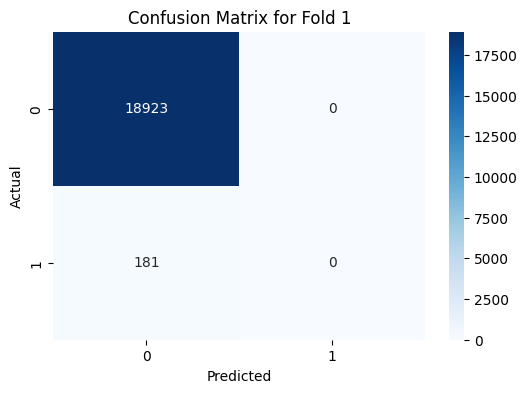

Training fold 2...
Epoch 1/10
4776/4776 [==============================] - 12s 2ms/step - loss: 0.0713 - accuracy: 0.9888 - val_loss: 0.0543 - val_accuracy: 0.9901
Epoch 2/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0531 - accuracy: 0.9896 - val_loss: 0.0538 - val_accuracy: 0.9901
Epoch 3/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0510 - accuracy: 0.9896 - val_loss: 0.0471 - val_accuracy: 0.9901
Epoch 4/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0522 - accuracy: 0.9896 - val_loss: 0.0490 - val_accuracy: 0.9901
Epoch 5/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0502 - accuracy: 0.9896 - val_loss: 0.0528 - val_accuracy: 0.9901
Epoch 6/10
597/597 [==============================] - 1s 2ms/step
Fold 2 Accuracy: 0.9898974036850922


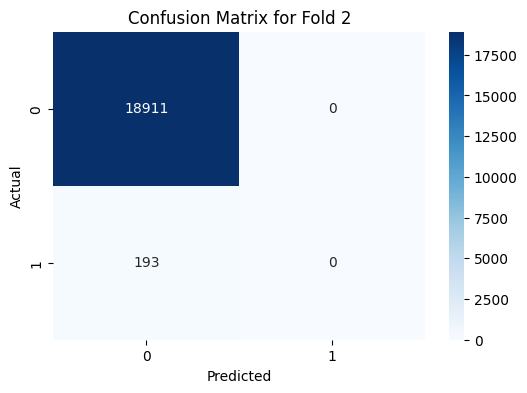

Training fold 3...
Epoch 1/10
4776/4776 [==============================] - 12s 2ms/step - loss: 0.0787 - accuracy: 0.9867 - val_loss: 0.0493 - val_accuracy: 0.9915
Epoch 2/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0580 - accuracy: 0.9894 - val_loss: 0.0482 - val_accuracy: 0.9915
Epoch 3/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0560 - accuracy: 0.9894 - val_loss: 0.0471 - val_accuracy: 0.9915
Epoch 4/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0546 - accuracy: 0.9894 - val_loss: 0.0429 - val_accuracy: 0.9915
Epoch 5/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0511 - accuracy: 0.9894 - val_loss: 0.0425 - val_accuracy: 0.9915
Epoch 6/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0498 - accuracy: 0.9894 - val_loss: 0.0494 - val_accuracy: 0.9915
Epoch 7/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0591 - accuracy: 0.9894 - val_lo

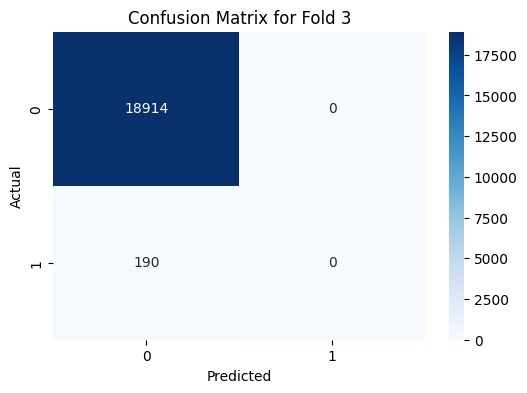

Training fold 4...
Epoch 1/10
4776/4776 [==============================] - 12s 2ms/step - loss: 0.0714 - accuracy: 0.9894 - val_loss: 0.0574 - val_accuracy: 0.9898
Epoch 2/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0568 - accuracy: 0.9898 - val_loss: 0.0563 - val_accuracy: 0.9898
Epoch 3/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0564 - accuracy: 0.9898 - val_loss: 0.0560 - val_accuracy: 0.9898
Epoch 4/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0526 - accuracy: 0.9898 - val_loss: 0.0502 - val_accuracy: 0.9898
Epoch 5/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0518 - accuracy: 0.9898 - val_loss: 0.0504 - val_accuracy: 0.9898
Epoch 6/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0525 - accuracy: 0.9897 - val_loss: 0.0571 - val_accuracy: 0.9898
Epoch 7/10
597/597 [==============================] - 1s 1ms/step
Fold 4 Accuracy: 0.988954614458462


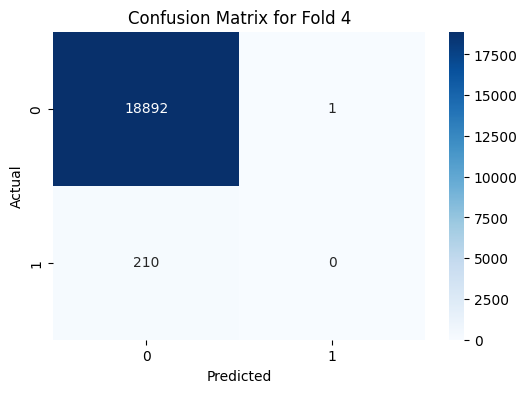

Training fold 5...
Epoch 1/10
4776/4776 [==============================] - 12s 2ms/step - loss: 0.0659 - accuracy: 0.9897 - val_loss: 0.0585 - val_accuracy: 0.9895
Epoch 2/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0564 - accuracy: 0.9897 - val_loss: 0.0573 - val_accuracy: 0.9895
Epoch 3/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0563 - accuracy: 0.9897 - val_loss: 0.0532 - val_accuracy: 0.9895
Epoch 4/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0571 - accuracy: 0.9897 - val_loss: 0.0568 - val_accuracy: 0.9895
Epoch 5/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0573 - accuracy: 0.9897 - val_loss: 0.0580 - val_accuracy: 0.9895
Epoch 6/10
597/597 [==============================] - 1s 1ms/step
Fold 5 Accuracy: 0.9902109616290635


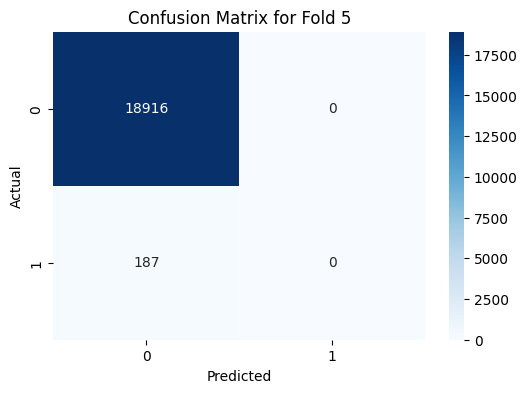

Training fold 6...
Epoch 1/10
4776/4776 [==============================] - 13s 2ms/step - loss: 0.0630 - accuracy: 0.9896 - val_loss: 0.0481 - val_accuracy: 0.9908
Epoch 2/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0556 - accuracy: 0.9896 - val_loss: 0.0509 - val_accuracy: 0.9908
Epoch 3/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0556 - accuracy: 0.9896 - val_loss: 0.0490 - val_accuracy: 0.9908
Epoch 4/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0489 - accuracy: 0.9896 - val_loss: 0.0395 - val_accuracy: 0.9908
Epoch 5/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0486 - accuracy: 0.9895 - val_loss: 0.0518 - val_accuracy: 0.9908
Epoch 6/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0554 - accuracy: 0.9896 - val_loss: 0.0512 - val_accuracy: 0.9908
Epoch 7/10
597/597 [==============================] - 1s 2ms/step
Fold 6 Accuracy: 0.9894257446474376


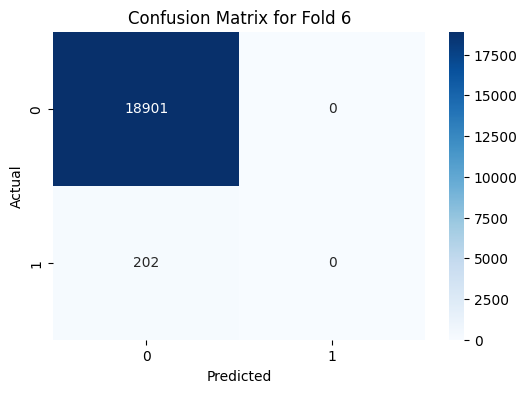

Training fold 7...
Epoch 1/10
4776/4776 [==============================] - 12s 2ms/step - loss: 0.0792 - accuracy: 0.9864 - val_loss: 0.0579 - val_accuracy: 0.9893
Epoch 2/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0561 - accuracy: 0.9898 - val_loss: 0.0571 - val_accuracy: 0.9893
Epoch 3/10
4776/4776 [==============================] - 8s 2ms/step - loss: 0.0558 - accuracy: 0.9898 - val_loss: 0.0606 - val_accuracy: 0.9893
Epoch 4/10
4776/4776 [==============================] - 8s 2ms/step - loss: 0.0568 - accuracy: 0.9898 - val_loss: 0.0597 - val_accuracy: 0.9893
Epoch 5/10
597/597 [==============================] - 1s 1ms/step
Fold 7 Accuracy: 0.9891116578547872


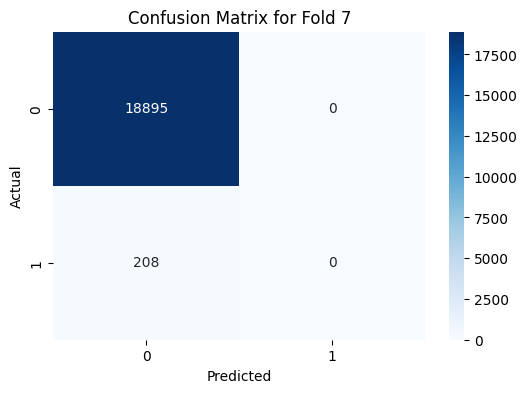

Training fold 8...
Epoch 1/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0699 - accuracy: 0.9897 - val_loss: 0.0582 - val_accuracy: 0.9890
Epoch 2/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0560 - accuracy: 0.9897 - val_loss: 0.0586 - val_accuracy: 0.9890
Epoch 3/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0556 - accuracy: 0.9897 - val_loss: 0.0608 - val_accuracy: 0.9890
Epoch 4/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0550 - accuracy: 0.9897 - val_loss: 0.0560 - val_accuracy: 0.9890
Epoch 5/10
4776/4776 [==============================] - 9s 2ms/step - loss: 0.0542 - accuracy: 0.9897 - val_loss: 0.0606 - val_accuracy: 0.9890
Epoch 6/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0574 - accuracy: 0.9897 - val_loss: 0.0605 - val_accuracy: 0.9890
Epoch 7/10
597/597 [==============================] - 1s 1ms/step
Fold 8 Accuracy: 0.9901062660315134


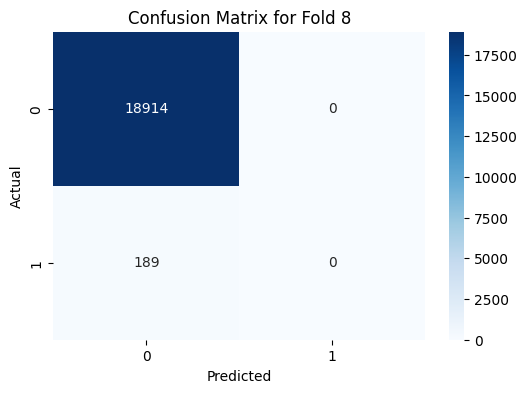

Training fold 9...
Epoch 1/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0704 - accuracy: 0.9898 - val_loss: 0.0573 - val_accuracy: 0.9896
Epoch 2/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0569 - accuracy: 0.9898 - val_loss: 0.0579 - val_accuracy: 0.9896
Epoch 3/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0562 - accuracy: 0.9898 - val_loss: 0.0576 - val_accuracy: 0.9896
Epoch 4/10
597/597 [==============================] - 1s 1ms/step
Fold 9 Accuracy: 0.9887975710621368


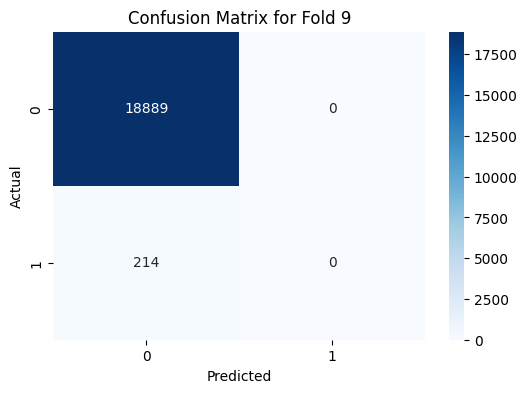

Training fold 10...
Epoch 1/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.1223 - accuracy: 0.9582 - val_loss: 0.0552 - val_accuracy: 0.9901
Epoch 2/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0556 - accuracy: 0.9896 - val_loss: 0.0505 - val_accuracy: 0.9901
Epoch 3/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0505 - accuracy: 0.9896 - val_loss: 0.0484 - val_accuracy: 0.9901
Epoch 4/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0524 - accuracy: 0.9896 - val_loss: 0.0555 - val_accuracy: 0.9901
Epoch 5/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0559 - accuracy: 0.9896 - val_loss: 0.0502 - val_accuracy: 0.9901
Epoch 6/10
597/597 [==============================] - 1s 1ms/step
Fold 10 Accuracy: 0.9899492226351881


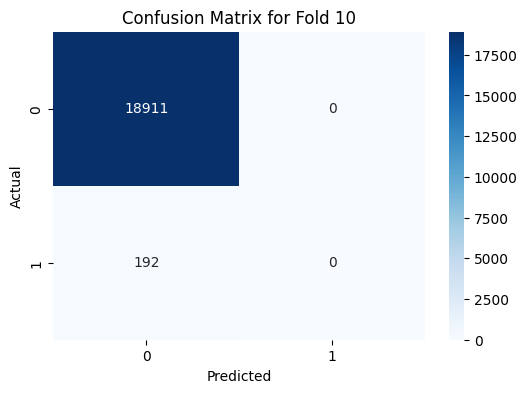

Average Accuracy after 10 folds: 0.9897033425253261


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf

for train_index, test_index in kf.split(X):
    print(f"Training fold {fold_no}...")

    # Use .iloc to access rows by their index positions
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Further split X_train and y_train into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111, random_state=42)

    # Build a new model for each fold
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
    ann.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # Compile the model
    ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Early stopping to avoid overfitting (defined here)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

    # Train the model
    ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Evaluate the model on the test data
    y_pred_prob = ann.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary predictions

    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {fold_no} Accuracy: {accuracy}")
    all_fold_accuracies.append(accuracy)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix (optional but helpful for visualization)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.show()

    fold_no += 1

# Average accuracy across all folds
average_accuracy = np.mean(all_fold_accuracies)
print(f"Average Accuracy after {kf.get_n_splits()} folds: {average_accuracy}")

# Model Variation:
In this variation, the hidden layers of the neural network use the **ReLU (Rectified Linear Unit)** activation function instead of `sigmoid`. 
- **ReLU** allows faster convergence and prevents issues such as vanishing gradients.
- The **output layer** retains the `sigmoid` activation function, which is appropriate for **binary classification** tasks (outputting probabilities between 0 and 1).
This modification can improve training speed and model performance on complex datasets.

Training fold 1...
Epoch 1/10
4776/4776 [==============================] - 9s 2ms/step - loss: 3.0329 - accuracy: 0.9803 - val_loss: 1.2085 - val_accuracy: 0.9896
Epoch 2/10
4776/4776 [==============================] - 9s 2ms/step - loss: 0.3882 - accuracy: 0.9855 - val_loss: 0.0766 - val_accuracy: 0.9897
Epoch 3/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0930 - accuracy: 0.9881 - val_loss: 0.0475 - val_accuracy: 0.9898
Epoch 4/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0429 - accuracy: 0.9898 - val_loss: 0.0394 - val_accuracy: 0.9897
Epoch 5/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0414 - accuracy: 0.9897 - val_loss: 0.0422 - val_accuracy: 0.9894
Epoch 6/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0416 - accuracy: 0.9897 - val_loss: 0.0402 - val_accuracy: 0.9895
Epoch 7/10
4776/4776 [==============================] - 8s 2ms/step - loss: 0.0685 - accuracy: 0.9898 - val_loss:

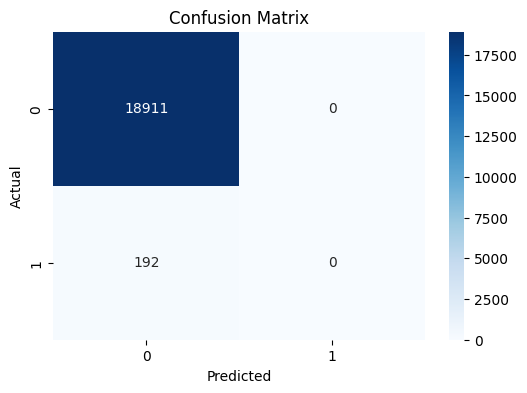

Training fold 2...
Epoch 1/10
4776/4776 [==============================] - 10s 2ms/step - loss: 7.9515 - accuracy: 0.9832 - val_loss: 2.6205 - val_accuracy: 0.9887
Epoch 2/10
4776/4776 [==============================] - 10s 2ms/step - loss: 2.1830 - accuracy: 0.9839 - val_loss: 5.4374 - val_accuracy: 0.9818
Epoch 3/10
4776/4776 [==============================] - 10s 2ms/step - loss: 1.7664 - accuracy: 0.9849 - val_loss: 1.8088 - val_accuracy: 0.9857
Epoch 4/10
4776/4776 [==============================] - 10s 2ms/step - loss: 1.2577 - accuracy: 0.9871 - val_loss: 1.7743 - val_accuracy: 0.9897
Epoch 5/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.6426 - accuracy: 0.9884 - val_loss: 0.1909 - val_accuracy: 0.9897
Epoch 6/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.3487 - accuracy: 0.9883 - val_loss: 0.1144 - val_accuracy: 0.9898
Epoch 7/10
4776/4776 [==============================] - 9s 2ms/step - loss: 0.2020 - accuracy: 0.9887 - val_los

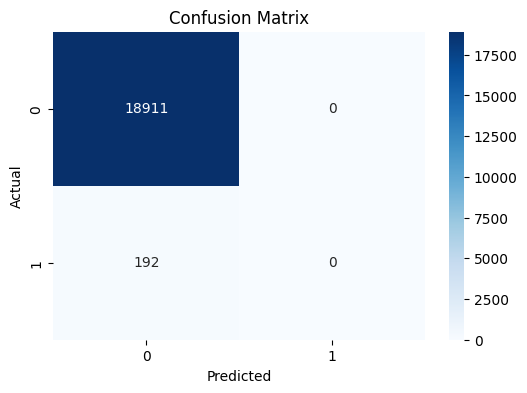

Training fold 3...
Epoch 1/10
4776/4776 [==============================] - 10s 2ms/step - loss: 14.8474 - accuracy: 0.9760 - val_loss: 8.1900 - val_accuracy: 0.9894
Epoch 2/10
4776/4776 [==============================] - 9s 2ms/step - loss: 5.9816 - accuracy: 0.9851 - val_loss: 10.7577 - val_accuracy: 0.9661
Epoch 3/10
4776/4776 [==============================] - 10s 2ms/step - loss: 5.4853 - accuracy: 0.9861 - val_loss: 20.7225 - val_accuracy: 0.9894
Epoch 4/10
4776/4776 [==============================] - 10s 2ms/step - loss: 4.4957 - accuracy: 0.9878 - val_loss: 2.7522 - val_accuracy: 0.9894
Epoch 5/10
4776/4776 [==============================] - 10s 2ms/step - loss: 3.3317 - accuracy: 0.9883 - val_loss: 0.6560 - val_accuracy: 0.9894
Epoch 6/10
4776/4776 [==============================] - 10s 2ms/step - loss: 3.2168 - accuracy: 0.9884 - val_loss: 1.1585 - val_accuracy: 0.9894
Epoch 7/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.7079 - accuracy: 0.9893 - val_

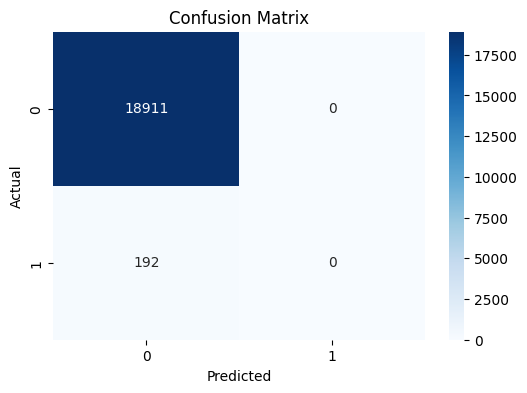

Training fold 4...
Epoch 1/10
4776/4776 [==============================] - 11s 2ms/step - loss: 2.6186 - accuracy: 0.9844 - val_loss: 1.8328 - val_accuracy: 0.9889
Epoch 2/10
4776/4776 [==============================] - 10s 2ms/step - loss: 1.1060 - accuracy: 0.9869 - val_loss: 0.6811 - val_accuracy: 0.9894
Epoch 3/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.7636 - accuracy: 0.9881 - val_loss: 0.3673 - val_accuracy: 0.9894
Epoch 4/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.1476 - accuracy: 0.9894 - val_loss: 0.0440 - val_accuracy: 0.9894
Epoch 5/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0430 - accuracy: 0.9896 - val_loss: 0.0478 - val_accuracy: 0.9894
Epoch 6/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0483 - accuracy: 0.9896 - val_loss: 0.0468 - val_accuracy: 0.9894
Epoch 7/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.0445 - accuracy: 0.9896 - val_lo

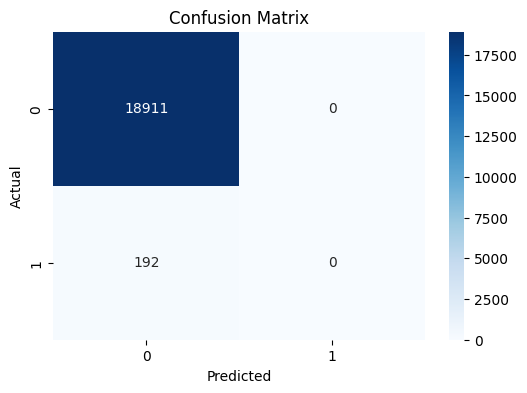

Training fold 5...
Epoch 1/10
4776/4776 [==============================] - 12s 2ms/step - loss: 7.3600 - accuracy: 0.9778 - val_loss: 3.0397 - val_accuracy: 0.9860
Epoch 2/10
4776/4776 [==============================] - 10s 2ms/step - loss: 3.1005 - accuracy: 0.9828 - val_loss: 1.3178 - val_accuracy: 0.9841
Epoch 3/10
4776/4776 [==============================] - 7s 2ms/step - loss: 1.8781 - accuracy: 0.9832 - val_loss: 0.8573 - val_accuracy: 0.9420
Epoch 4/10
4776/4776 [==============================] - 8s 2ms/step - loss: 1.5676 - accuracy: 0.9851 - val_loss: 1.5669 - val_accuracy: 0.9888
Epoch 5/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.9954 - accuracy: 0.9841 - val_loss: 0.8314 - val_accuracy: 0.9894
Epoch 6/10
4776/4776 [==============================] - 9s 2ms/step - loss: 0.7252 - accuracy: 0.9860 - val_loss: 0.1884 - val_accuracy: 0.9875
Epoch 7/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.5229 - accuracy: 0.9874 - val_loss:

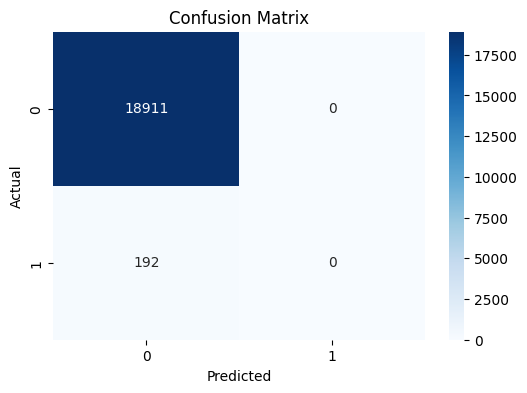

Training fold 6...
Epoch 1/10
4776/4776 [==============================] - 11s 2ms/step - loss: 5.6079 - accuracy: 0.9802 - val_loss: 0.2959 - val_accuracy: 0.9896
Epoch 2/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.2544 - accuracy: 0.9880 - val_loss: 0.1582 - val_accuracy: 0.9896
Epoch 3/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0783 - accuracy: 0.9896 - val_loss: 0.0488 - val_accuracy: 0.9894
Epoch 4/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0469 - accuracy: 0.9896 - val_loss: 0.0608 - val_accuracy: 0.9894
Epoch 5/10
4776/4776 [==============================] - 9s 2ms/step - loss: 0.0413 - accuracy: 0.9896 - val_loss: 0.0405 - val_accuracy: 0.9894
Epoch 6/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0508 - accuracy: 0.9896 - val_loss: 0.0423 - val_accuracy: 0.9894
Epoch 7/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0399 - accuracy: 0.9896 - val_los

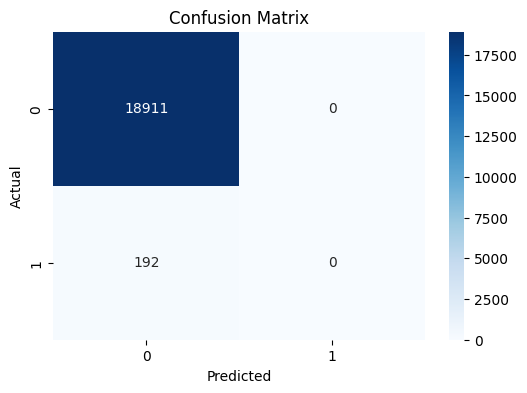

Training fold 7...
Epoch 1/10
4776/4776 [==============================] - 11s 2ms/step - loss: 2.3251 - accuracy: 0.9774 - val_loss: 0.3569 - val_accuracy: 0.9892
Epoch 2/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.7367 - accuracy: 0.9830 - val_loss: 0.6110 - val_accuracy: 0.9865
Epoch 3/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.4293 - accuracy: 0.9850 - val_loss: 0.7484 - val_accuracy: 0.9947
Epoch 4/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.2646 - accuracy: 0.9866 - val_loss: 0.1860 - val_accuracy: 0.9780
Epoch 5/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.1313 - accuracy: 0.9879 - val_loss: 0.2599 - val_accuracy: 0.9895
Epoch 6/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0509 - accuracy: 0.9891 - val_loss: 0.0308 - val_accuracy: 0.9898
Epoch 7/10
4776/4776 [==============================] - 10s 2ms/step - loss: 0.0411 - accuracy: 0.9897 - val_lo

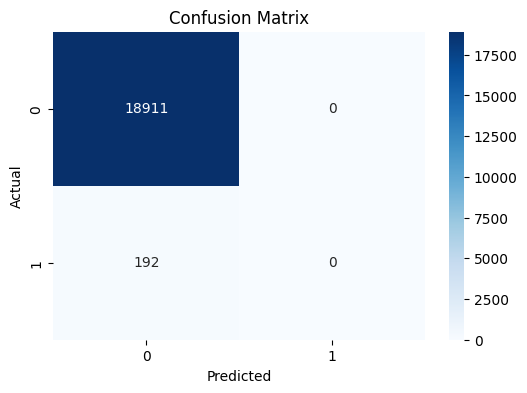

Training fold 8...
Epoch 1/10
4776/4776 [==============================] - 14s 3ms/step - loss: 8.1063 - accuracy: 0.9618 - val_loss: 4.2395 - val_accuracy: 0.8791
Epoch 2/10
4776/4776 [==============================] - 12s 3ms/step - loss: 3.1683 - accuracy: 0.9848 - val_loss: 2.1537 - val_accuracy: 0.9815
Epoch 3/10
4776/4776 [==============================] - 13s 3ms/step - loss: 1.5239 - accuracy: 0.9860 - val_loss: 0.5142 - val_accuracy: 0.9894
Epoch 4/10
4776/4776 [==============================] - 13s 3ms/step - loss: 0.5241 - accuracy: 0.9873 - val_loss: 0.4449 - val_accuracy: 0.9894
Epoch 5/10
4776/4776 [==============================] - 13s 3ms/step - loss: 0.4057 - accuracy: 0.9883 - val_loss: 0.5442 - val_accuracy: 0.9894
Epoch 6/10
4776/4776 [==============================] - 13s 3ms/step - loss: 0.1598 - accuracy: 0.9888 - val_loss: 0.0712 - val_accuracy: 0.9894
Epoch 7/10
4776/4776 [==============================] - 13s 3ms/step - loss: 0.0730 - accuracy: 0.9893 - val_lo

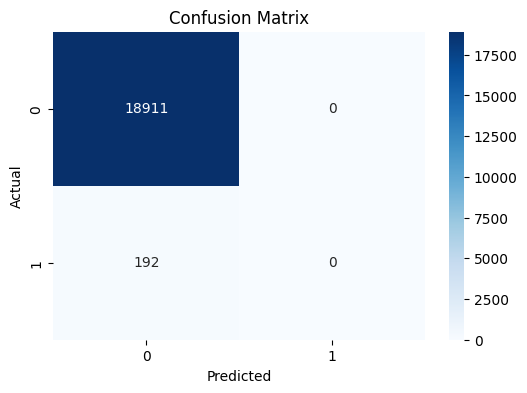

Training fold 9...
Epoch 1/10
4776/4776 [==============================] - 14s 3ms/step - loss: 8.2214 - accuracy: 0.9788 - val_loss: 5.2141 - val_accuracy: 0.9825
Epoch 2/10
4776/4776 [==============================] - 13s 3ms/step - loss: 4.6425 - accuracy: 0.9839 - val_loss: 2.6356 - val_accuracy: 0.9895
Epoch 3/10
4776/4776 [==============================] - 13s 3ms/step - loss: 3.4580 - accuracy: 0.9849 - val_loss: 0.4651 - val_accuracy: 0.9905
Epoch 4/10
4776/4776 [==============================] - 13s 3ms/step - loss: 2.7648 - accuracy: 0.9851 - val_loss: 0.1963 - val_accuracy: 0.9871
Epoch 5/10
4776/4776 [==============================] - 11s 2ms/step - loss: 2.3230 - accuracy: 0.9856 - val_loss: 0.3652 - val_accuracy: 0.9935
Epoch 6/10
4776/4776 [==============================] - 11s 2ms/step - loss: 2.2569 - accuracy: 0.9857 - val_loss: 1.2728 - val_accuracy: 0.9917
Epoch 7/10
597/597 [==============================] - 1s 1ms/step
Fold 9 Accuracy: 0.9917818257956449


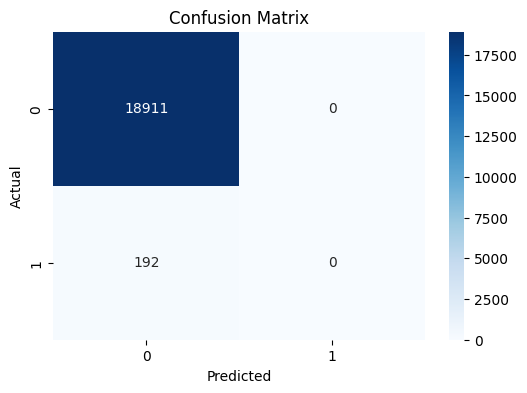

Training fold 10...
Epoch 1/10
4776/4776 [==============================] - 12s 2ms/step - loss: 14.1023 - accuracy: 0.9712 - val_loss: 33.9089 - val_accuracy: 0.9893
Epoch 2/10
4776/4776 [==============================] - 11s 2ms/step - loss: 6.3073 - accuracy: 0.9830 - val_loss: 8.5264 - val_accuracy: 0.9897
Epoch 3/10
4776/4776 [==============================] - 11s 2ms/step - loss: 6.2706 - accuracy: 0.9852 - val_loss: 2.0022 - val_accuracy: 0.9849
Epoch 4/10
4776/4776 [==============================] - 11s 2ms/step - loss: 4.7085 - accuracy: 0.9865 - val_loss: 1.9373 - val_accuracy: 0.9880
Epoch 5/10
4776/4776 [==============================] - 11s 2ms/step - loss: 2.8847 - accuracy: 0.9875 - val_loss: 0.9144 - val_accuracy: 0.9881
Epoch 6/10
4776/4776 [==============================] - 11s 2ms/step - loss: 2.1003 - accuracy: 0.9862 - val_loss: 2.0024 - val_accuracy: 0.9898
Epoch 7/10
4776/4776 [==============================] - 11s 2ms/step - loss: 0.7761 - accuracy: 0.9870 - val

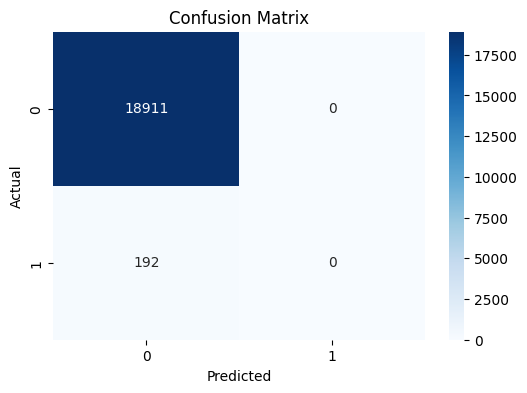

Average Accuracy after 10 folds: 0.9904416000733836


In [28]:
fold_no = 1
for train_index, test_index in kf.split(X):
    print(f"Training fold {fold_no}...")

    # Splitting data into training and test sets for this fold

    # Initial split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1, random_state=42)
    # Further split X_train and y_train into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111, random_state=42)

    # Build a new model for each fold with ReLU activation in hidden layers
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=10, activation='relu'))  # ReLU activation for hidden layer 1
    ann.add(tf.keras.layers.Dense(units=10, activation='relu'))  # ReLU activation for hidden layer 2
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Sigmoid activation for the output layer (binary classification)

    # Compile the model
    ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model (use early stopping or define your own number of epochs)    
    ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


    # Evaluate the model on the test data
    y_pred_prob = ann.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to binary predictions

    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {fold_no} Accuracy: {accuracy}")
    all_fold_accuracies.append(accuracy)

    # Plot confusion matrix (optional but helpful for visualization)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    fold_no += 1

# Average accuracy across all folds
average_accuracy = np.mean(all_fold_accuracies)
print(f"Average Accuracy after {k} folds: {average_accuracy}")